# Different Expression Analysis with DEseq2

An important task of bulk rna-seq analysis is the different expression , which we can perform with omicverse. For different expression analysis, ov change the `gene_id` to `gene_name` of matrix first. 

Now we can use `PyDEseq2` to perform DESeq2 analysis like R

Paper: [PyDESeq2: a python package for bulk RNA-seq differential expression analysis](https://www.biorxiv.org/content/10.1101/2022.12.14.520412v1)

Code: https://github.com/owkin/PyDESeq2

Colab_Reproducibility：https://colab.research.google.com/drive/1fZS-v0zdIYkXrEoIAM1X5kPoZVfVvY5h?usp=sharing

In [1]:
import omicverse as ov
ov.plot_set(font_path='Arial')
!date

🔬 Starting plot initialization...
Using already downloaded Arial font from: /tmp/omicverse_arial.ttf
Registered as: Arial
🧬 Detecting CUDA devices…
✅ [GPU 0] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5
✅ [GPU 1] NVIDIA GeForce RTX 2080 Ti
    • Total memory: 10.7 GB
    • Compute capability: 7.5

   ____            _     _    __                  
  / __ \____ ___  (_)___| |  / /__  _____________ 
 / / / / __ `__ \/ / ___/ | / / _ \/ ___/ ___/ _ \ 
/ /_/ / / / / / / / /__ | |/ /  __/ /  (__  )  __/ 
\____/_/ /_/ /_/_/\___/ |___/\___/_/  /____/\___/                                              

🔖 Version: 1.7.6rc1   📚 Tutorials: https://omicverse.readthedocs.io/
✅ plot_set complete.

2025年 08月 04日 星期一 20:32:29 CST


Note that this dataset has not been processed in any way and is only exported by `featureCounts`, and Sequence alignment was performed from the genome file of CRCm39

In [2]:
data=ov.utils.read('https://raw.githubusercontent.com/Starlitnightly/Pyomic/master/sample/counts.txt',index_col=0,header=1)
#replace the columns `.bam` to `` 
data.columns=[i.split('/')[-1].replace('.bam','') for i in data.columns]
data.head()

,1--1,1--2,2--1,2--2,3--1,3--2,4--1,4--2,4-3,4-4,Blank-1,Blank-2
Geneid,,,,,,,,,,,,
ENSMUSG00000102628,0,0,0,0,5,0,0,0,0,0,0,9
ENSMUSG00000100595,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000097426,5,0,0,0,0,0,0,1,0,0,0,0
ENSMUSG00000104478,0,0,0,0,0,0,0,0,0,0,0,0
ENSMUSG00000104385,0,0,0,0,0,0,0,0,0,0,0,0


## ID mapping

We performed the gene_id mapping by the mapping pair file `GRCm39` downloaded before.

In [3]:
ov.utils.download_geneid_annotation_pair()

......Geneid Annotation Pair download start: pair_GRCm39
......Loading dataset from genesets/pair_GRCm39.tsv
......Geneid Annotation Pair download start: pair_T2TCHM13
......Loading dataset from genesets/pair_T2TCHM13.tsv
......Geneid Annotation Pair download start: pair_GRCh38
......Loading dataset from genesets/pair_GRCh38.tsv
......Geneid Annotation Pair download start: pair_GRCh37
......Loading dataset from genesets/pair_GRCh37.tsv
......Geneid Annotation Pair download start: pair_danRer11
......Loading dataset from genesets/pair_danRer11.tsv
......Geneid Annotation Pair download start: pair_danRer7
......Loading dataset from genesets/pair_danRer7.tsv
......Geneid Annotation Pair download finished!


In [4]:
data=ov.bulk.Matrix_ID_mapping(data,'genesets/pair_GRCm39.tsv')
data.head()

,1--1,1--2,2--1,2--2,3--1,3--2,4--1,4--2,4-3,4-4,Blank-1,Blank-2
7SK,0,0,0,0,0,0,0,1,0,0,0,0
Gm3756,871,835,832,634,1004,1058,894,914,419,622,186,322
Gm4789,0,0,0,0,0,0,0,0,0,0,0,0
Speer4cos,0,0,0,2,0,0,0,0,0,0,0,0
Gm29123,0,0,0,5,5,3,3,6,0,0,0,0


## Different expression analysis with ov

We can do differential expression analysis very simply by ov, simply by providing an expression matrix. To run DEG, we simply need to:

- Read the raw count by featureCount or any other qualify methods.
- Create an ov DEseq object.

In [5]:
dds=ov.bulk.pyDEG(data)

We notes that the gene_name mapping before exist some duplicates, we will process the duplicate indexes to retain only the highest expressed genes

In [6]:
dds.drop_duplicates_index()
print('... drop_duplicates_index success')

... drop_duplicates_index success


Now we can calculate the different expression gene from matrix, we need to input the treatment and control groups

In [7]:
treatment_groups=['4-3','4-4']
control_groups=['1--1','1--2']
result=dds.deg_analysis(treatment_groups,control_groups,method='DEseq2')


⚙️ You are using DEseq2 method for differential expression analysis.
⏰ Start to create DeseqDataSet...
Using None as control genes, passed at DeseqDataSet initialization


Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 4.82 seconds.

Fitting dispersion trend curve...
... done in 1.65 seconds.

Fitting MAP dispersions...


logres_prior=1.1537136992450465, sigma_prior=0.25


... done in 4.81 seconds.

Fitting LFCs...
... done in 4.24 seconds.

Calculating cook's distance...
... done in 0.01 seconds.

Replacing 0 outlier genes.

Running Wald tests...
... done in 7.35 seconds.



Log2 fold change & Wald test p-value: condition Treatment vs Control
              baseMean  log2FoldChange     lfcSE      stat    pvalue      padj
Col1a1   423027.497997        0.648332  0.190040  3.411561  0.000646  0.014797
Col3a1   398670.233264        0.361264  0.200466  1.802123  0.071526  0.320767
Col1a2   370451.200784        0.360589  0.219110  1.645698  0.099826  0.382997
Sparc    126792.682177        0.235777  0.200854  1.173868  0.240448  0.588733
Eef1a1    91964.152908       -0.226122  0.175229 -1.290439  0.196898  0.538035
...                ...             ...       ...       ...       ...       ...
Gm46644       0.000000             NaN       NaN       NaN       NaN       NaN
Gm28283       0.000000             NaN       NaN       NaN       NaN       NaN
Gm48011       0.000000             NaN       NaN       NaN       NaN       NaN
Gm15580       0.000000             NaN       NaN       NaN       NaN       NaN
Gm31818       0.000000             NaN       NaN       NaN    

One important thing is that we do not filter out low expression genes when processing DEGs, and in future versions I will consider building in the corresponding processing.

In [8]:
print(result.shape)
result=result.loc[result['log2(BaseMean)']>1]
print(result.shape)

(54504, 14)
(23375, 14)


We also need to set the threshold of Foldchange, we prepare a method named `foldchange_set` to finish. This function automatically calculates the appropriate threshold based on the log2FC distribution, but you can also enter it manually.

In [9]:
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=10)

... Fold change threshold: 1.6249079724346087


## Visualize the DEG result and specific genes

To visualize the DEG result, we use `plot_volcano` to do it. This fuction can visualize the gene interested or high different expression genes. There are some parameters you need to input:

- title: The title of volcano
- figsize: The size of figure
- plot_genes: The genes you interested
- plot_genes_num: If you don't have interested genes, you can auto plot it.

🌋 Volcano Plot Analysis:
   Total genes: 54504
   ↗️  Upregulated genes: 102
   ↘️  Downregulated genes: 241
   ➡️  Non-significant genes: 54161
   🎯 Total significant genes: 343
   log2FC range: -11.62 to 8.76
   qvalue range: 5.74e-65 to 1.00e+00

⚙️  Current Function Parameters:
   Data columns: pval_name='qvalue', fc_name='log2FC'
   Thresholds: pval_threshold=0.05, fc_max=1.6249079724346087, fc_min=-1.6249079724346087
   Plot size: figsize=(4, 4)
   Gene labels: plot_genes_num=8, plot_genes_fontsize=12
   Custom genes: None (auto-select top genes)

💡 Parameter Optimization Suggestions:
   ▶ Wide fold change range detected:
     Current: fc_max=1.6249079724346087, fc_min=-1.6249079724346087
     Suggested: fc_max=3.3, fc_min=-3.1

   📋 Copy-paste ready function call:
   ov.pl.volcano(result, fc_max=3.3, fc_min=-3.1)
────────────────────────────────────────────────────────────


<Axes: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>

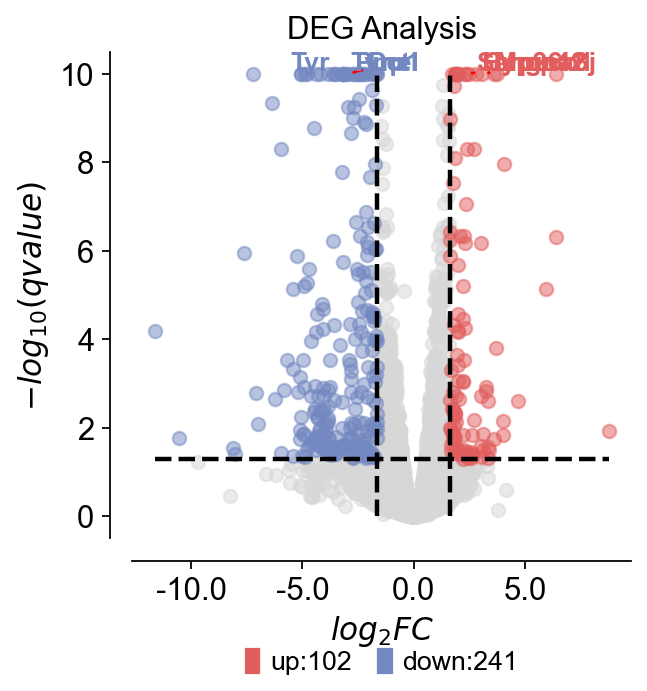

In [10]:
dds.plot_volcano(title='DEG Analysis',figsize=(4,4),
                 plot_genes_num=8,plot_genes_fontsize=12,)

To visualize the specific genes, we only need to use the `dds.plot_boxplot` function to finish it.

(<Figure size 160x240 with 1 Axes>,
 <Axes: title={'center': 'Gene Expression'}>)

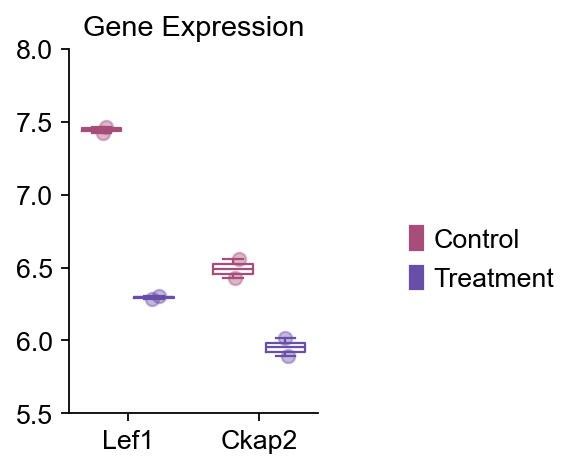

In [11]:
dds.plot_boxplot(genes=['Ckap2','Lef1'],treatment_groups=treatment_groups,
                control_groups=control_groups,figsize=(2,3),fontsize=12,
                 legend_bbox=(2,0.55))

(<Figure size 160x240 with 1 Axes>,
 <Axes: title={'center': 'Gene Expression'}>)

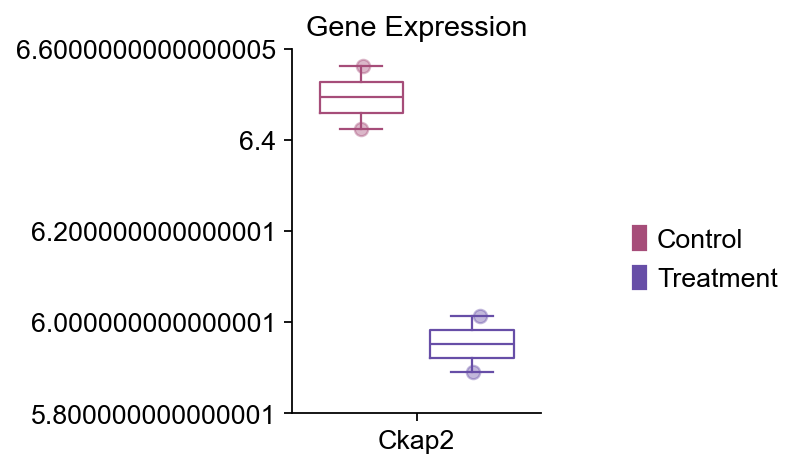

In [12]:
dds.plot_boxplot(genes=['Ckap2'],treatment_groups=treatment_groups,
                control_groups=control_groups,figsize=(2,3),fontsize=12,
                 legend_bbox=(2,0.55))

## Pathway enrichment analysis by Pyomic

Here we use the `gseapy` package, which included the GSEA analysis and Enrichment. We have optimised the output of the package and given some better looking graph drawing functions

Similarly, we need to download the pathway/genesets first. Five genesets we prepare previously, you can use `Pyomic.utils.download_pathway_database()` to download automatically. Besides, you can download the pathway you interested from enrichr: https://maayanlab.cloud/Enrichr/#libraries

In [13]:
ov.utils.download_pathway_database()

......Pathway Geneset download start: GO_Biological_Process_2021
......Loading dataset from genesets/GO_Biological_Process_2021.txt
......Pathway Geneset download start: GO_Cellular_Component_2021
......Loading dataset from genesets/GO_Cellular_Component_2021.txt
......Pathway Geneset download start: GO_Molecular_Function_2021
......Loading dataset from genesets/GO_Molecular_Function_2021.txt
......Pathway Geneset download start: WikiPathway_2021_Human
......Loading dataset from genesets/WikiPathway_2021_Human.txt
......Pathway Geneset download start: WikiPathways_2019_Mouse
......Loading dataset from genesets/WikiPathways_2019_Mouse.txt
......Pathway Geneset download start: Reactome_2022
......Loading dataset from genesets/Reactome_2022.txt
......Pathway Geneset download finished!
......Other Genesets can be dowload in `https://maayanlab.cloud/Enrichr/#libraries`


In [14]:
pathway_dict=ov.utils.geneset_prepare('genesets/WikiPathways_2019_Mouse.txt',organism='Mouse')

To perform the GSEA analysis, we need to ranking the genes at first. Using `dds.ranking2gsea` can obtain a ranking gene's matrix sorted by -log10(padj).

$Metric=\frac{-log_{10}(padj)}{sign(log2FC)}$

In [15]:
rnk=dds.ranking2gsea()

We used `ov.bulk.pyGSEA` to construst a GSEA object to perform enrichment.

In [16]:
gsea_obj=ov.bulk.pyGSEA(rnk,pathway_dict)

In [17]:
enrich_res=gsea_obj.enrichment()

2025-08-04 20:33:12,161 [WARNING] Input gene rankings contains NA values(gene name and ranking value), drop them all!


The results are stored in the `enrich_res` attribute.

In [18]:
gsea_obj.enrich_res.head()

,es,nes,pval,fdr,geneset_size,matched_size,genes,ledge_genes,logp,logc,num,fraction,Term,P-value
Term,,,,,,,,,,,,,,
Matrix Metalloproteinases WP441,0.879559,2.130932,0.0,0.000000,29,27,Mmp11;Mmp14;Mmp3;Mmp12;Timp4;Timp1;Mmp28;Mmp9;...,Mmp11;Mmp14;Mmp3;Mmp12;Timp4;Timp1;Mmp28;Mmp9;...,9.210340,2.130932,27,0.931034,Matrix Metalloproteinases WP441,0.000000
TYROBP Causal Network WP3625,0.786393,2.265619,0.0,0.000000,58,57,Itgax;Itgb2;Rgs1;Gpx1;Lhfpl2;Tcirg1;Cxcl16;Cd3...,Itgax;Itgb2;Rgs1;Gpx1;Lhfpl2;Tcirg1;Cxcl16;Cd3...,9.210340,2.265619,57,0.982759,TYROBP Causal Network WP3625,0.000000
Metapathway biotransformation WP1251,0.643932,2.056904,0.0,0.003933,141,120,Cyp26b1;Cyp2e1;Fmo2;Gpx1;Cyp4b1;Cyp11a1;Mgst2;...,Cyp26b1;Cyp2e1;Fmo2;Gpx1;Cyp4b1;Cyp11a1;Mgst2;...,5.513211,2.056904,120,0.851064,Metapathway biotransformation WP1251,0.003933
G1 to S cell cycle control WP413,-0.759241,-2.216071,0.0,0.004248,61,60,Cdkn2a;Cdkn2b;Gadd45a;Ccng2;Cdk6;Mdm2;Cdkn1b;M...,Tfdp2;Orc1;Rpa2;Orc2;Pola2;Ccne1;Ccne2;Cdkn1a;...,5.438099,-2.216071,60,0.983607,G1 to S cell cycle control WP413,0.004248
Oxidation by Cytochrome P450 WP1274,0.772368,2.035643,0.0,0.005900,40,36,Cyp26b1;Cyp2e1;Por;Cyp4b1;Cyp11a1;Cyp4v3;Cyp2f...,Cyp26b1;Cyp2e1;Por;Cyp4b1;Cyp11a1;Cyp4v3;Cyp2f...,5.116045,2.035643,36,0.900000,Oxidation by Cytochrome P450 WP1274,0.005900


To visualize the enrichment, we use `plot_enrichment` to do.
- num: The number of enriched terms to plot. Default is 10.
- node_size: A list of integers defining the size of nodes in the plot. Default is [5,10,15].
- cax_loc: The location of the colorbar on the plot. Default is 2.
- cax_fontsize: The fontsize of the colorbar label. Default is 12.
- fig_title: The title of the plot. Default is an empty string.
- fig_xlabel: The label of the x-axis. Default is 'Fractions of genes'.
- figsize: The size of the plot. Default is (2,4).
- cmap: The colormap to use for the plot. Default is 'YlGnBu'.

<Axes: title={'center': 'Wiki Pathway Enrichment'}, xlabel='Fractions of genes'>

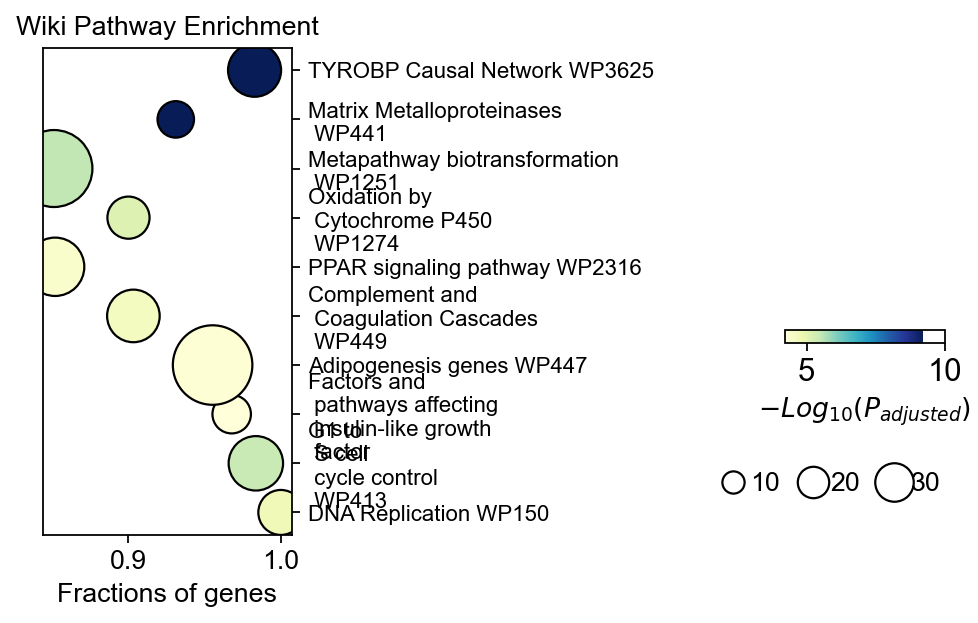

In [20]:
gsea_obj.plot_enrichment(num=10,node_size=[10,20,30],
                        cax_fontsize=12,
                        fig_title='Wiki Pathway Enrichment',fig_xlabel='Fractions of genes',
                        figsize=(2,4),cmap='YlGnBu',
                        text_knock=2,text_maxsize=30,
                        cax_loc=[2.5, 0.45, 0.5, 0.02],)
                          # bbox_to_anchor_used=(-0.25, -13),node_diameter=10,)

Not only the basic analysis, pyGSEA also help us to visualize the term with Ranked and Enrichment Score. 

We can select the number of term to plot, which stored in `gsea_obj.enrich_res.index`, the `0` is `Complement and Coagulation Cascades WP449` and the `1` is `Matrix Metalloproteinases WP441`

In [21]:
gsea_obj.enrich_res.index[:5]

Index(['Matrix Metalloproteinases WP441', 'TYROBP Causal Network WP3625',
       'Metapathway biotransformation WP1251',
       'G1 to S cell cycle control WP413',
       'Oxidation by Cytochrome P450 WP1274'],
      dtype='object', name='Term')

We can set the `gene_set_title` to change the title of GSEA plot

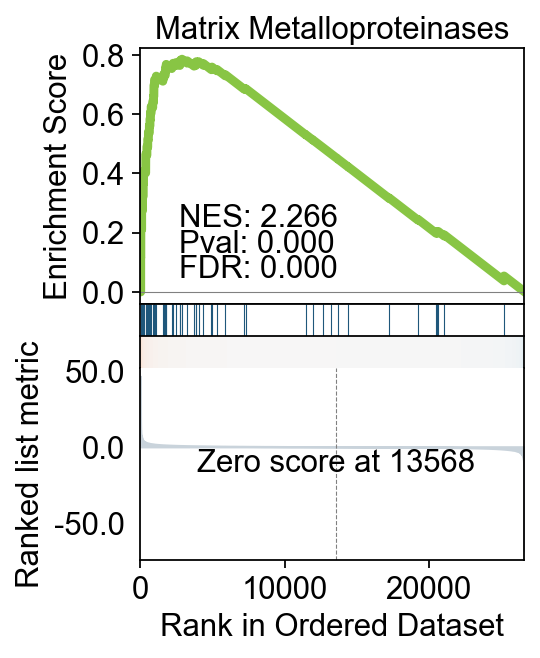

In [22]:
fig=gsea_obj.plot_gsea(term_num=1,
                  gene_set_title='Matrix Metalloproteinases',
                  figsize=(3,4),
                  cmap='RdBu_r',
                  title_fontsize=14,
                  title_y=0.95)